In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_email = pd.read_csv('emails.csv')

In [3]:
df_email

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [3]:
ham = df_email[df_email['spam']==0]
spam = df_email[df_email['spam']==1]

In [10]:
print('spam{}',int(((len(ham)/len(df_email))*100)), '%')

spam{} 76 %


In [11]:
print('spam{}',int(((len(spam)/len(df_email))*100)), '%')

spam{} 23 %


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


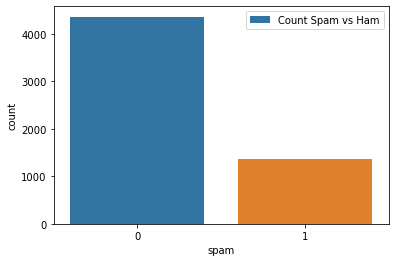

In [14]:
sns.countplot(df_email['spam'], label='Count Spam vs Ham')
plt.legend()

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
testing_sample = ['This is first document.', 'This is second document']    
sample_vectorizer = CountVectorizer()


In [17]:
X = sample_vectorizer.fit_transform(sample_data)

In [18]:
print(X.toarray())

[[1 1 1 0 1]
 [1 0 1 1 1]]


In [20]:
print(sample_vectorizer.get_feature_names())

['document', 'first', 'is', 'second', 'this']


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
spamham_countvecrizer = vectorizer.fit_transform(df_email['text'])
testing_sample= vectorizer.transform(testing_sample)


In [30]:
print(spamham_countvecrizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [32]:
spamham_countvecrizer.shape

(5728, 37303)

In [9]:
label = df_email['spam'].values
label

array([1, 1, 1, ..., 0, 0, 0])

In [35]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(spamham_countvecrizer, label)

MultinomialNB()

In [37]:
testing_sample = ['Free money!!', 'Hi kim, Please let me know if you want my help']
testing_sample_countvectorizer = vectorizer.transform(testing_sample)

In [38]:
y_pred = NB_classifier.predict(testing_sample_countvectorizer)

In [51]:
label = df_email['text']
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
training_sample =vectorizer.fit_transform(df_email['text'])
testing_sample= vectorizer.transform(testing_sample)


AttributeError: lower not found

In [13]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(spamham_countvecrizer, label)

MultinomialNB()

In [14]:
y_pred = NB_classifier.predict(testing_sample)

In [10]:
X=spamham_countvecrizer
y=label

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y, random_state=0, train_size=0.2)

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)

ValueError: Found input variables with inconsistent numbers of samples: [4583, 2]

# 試してみる

In [3]:
df_email


,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [4]:
ham = df_email[df_email['text']==1]
spam = df_email[df_email['text']==0]

In [26]:
X=df_email['text'].values
y=df_email['spam'].values

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

In [29]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train,y_train)

MultinomialNB()

In [30]:
X_te=['Free money!!', 'Hi kim, Please let me know if you want my help']

In [31]:
X_te = vect.transform(X_te)

In [34]:
y_pred= NB_classifier.predict(X_test)

<AxesSubplot:>

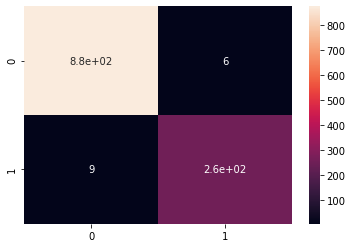

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [37]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       882
           1       0.98      0.97      0.97       264

    accuracy                           0.99      1146
   macro avg       0.98      0.98      0.98      1146
weighted avg       0.99      0.99      0.99      1146

